# Feature Engineering

In [37]:
import pandas as pd
house_prices = pd.read_csv("house_prices.csv", index_col=0)
house_prices

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [38]:
house_prices.isna().any(axis=1) #.isna() check False  ,   .any() เช็คว่ามี True มั้ย  ปกติแนว column , .any(axis=1) row 

0         False
1         False
2         False
3         False
4         False
          ...  
168435    False
168436    False
168438    False
168439    False
168445    False
Length: 99499, dtype: bool

In [39]:
selector = house_prices.isna().any(axis=1)
house_prices.isna().any(axis=1)[selector] #selector check ช่องว่าง

Series([], dtype: bool)

# Handling missing values

## Deletion

In [40]:
# dropna ไม่ได้ทำที่ของจริง ต้องเอาตัวแปรรับ
# ลบ(ข้อมูลที่มีตัวว่าง)ทั้งแถว / column
house_prices.dropna(axis=0) #0 row, 1 column
# เลือกลบตามกำหนด
house_prices.dropna(axis=0, subset=["location", "city"])
house_prices.dropna(axis=0, subset=["location", "city"])

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


## Imputation

In [41]:
import pandas as pd
house_prices = pd.read_csv("house_prices.csv", index_col=0)
house_prices

#เติมตัวที่ว่าง
# house_prices.fillna("mookmookmook")
house_prices.fillna("City")

# เฉพาะ column
house_prices["city"].fillna("Bangkok") # ต้องเอาตัวแปรรับ
# house_prices["city"].fillna("Bangkok", inplace=True) #ทับตัวเดิม

0         Islamabad
1         Islamabad
2         Islamabad
3         Islamabad
4         Islamabad
            ...    
168435      Karachi
168436      Karachi
168438      Karachi
168439      Karachi
168445      Karachi
Name: city, Length: 99499, dtype: object

## Scaling

In [42]:
house_prices.describe() #statistical information
# ข้อมูลต่างกันมาก price หลักล้าน ตัวอื่นหลักร้อย

,price,baths,bedrooms,Area_in_Marla
count,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,1.037592e+07,3.530106,3.350737,8.757479
std,1.066000e+07,1.474217,1.255913,7.466471
min,1.550000e+04,1.000000,0.000000,0.000000
25%,1.500000e+05,2.000000,2.000000,4.800000
50%,7.500000e+06,3.000000,3.000000,6.700000
75%,1.550000e+07,5.000000,4.000000,10.000000
max,4.490000e+07,7.000000,6.000000,194.000000


In [43]:
from sklearn.preprocessing import MinMaxScaler # scal 0 ถึง 1

#### สร้าง object ที่จะ scal

In [44]:
# scal พื้นที่
import pandas as pd
house_prices = pd.read_csv("house_prices.csv", index_col=0)
house_prices
scaler = MinMaxScaler()  #object
scaler.fit(house_prices[["Area_in_Marla"]]) # method ที่สั่งให้ object เรียนรู้ข้องมูลที่ต้องการ #ใส่เป็น [[]] แก้ไขปัญหา พื้นที่
scaler.transform(house_prices[["Area_in_Marla"]]) #tranform scal 0-1, เรียก method ที่จะใช้
house_prices["area_scaled"] = scaler.transform(house_prices[["Area_in_Marla"]])
house_prices

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,area_scaled
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,0.020619
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,0.028866
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,0.041237
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,0.206186
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,0.041237
...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,0.041237
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0,0.041237
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,0.041237
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0,0.072165


In [45]:
from sklearn.preprocessing import StandardScaler

zmv = StandardScaler()
zmv.fit(house_prices[["bedrooms"]])
house_prices["bedroom_scaled"] = zmv.transform(house_prices[["bedrooms"]])
house_prices

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,area_scaled,bedroom_scaled
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,0.020619,-1.075507
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,0.028866,-0.279270
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,0.041237,1.313205
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,0.206186,0.516967
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,0.041237,-0.279270
...,...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,0.041237,-0.279270
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0,0.041237,-0.279270
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,0.041237,-0.279270
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0,0.072165,0.516967


##### log tranformation

In [53]:
%pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.9 kB 1.1 MB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 880.9 kB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.0/8.0 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.1/8.0 MB 655.4 kB/s eta 0:00:13
    --------------------------------------- 0.1/8.0 MB 726.2 kB/s eta 0:00:11
    --------------------------------------- 0.2/8.0 MB 702.7 kB/s eta 0:00:12
    --------------------------------------- 0.2/8.0 MB 697.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/8.0 MB 653.6 kB/s eta 0:00:12
   - -------------------------------------- 0.3/8.0 MB 863.3 kB/s eta 0:00:0


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: ylabel='Frequency'>

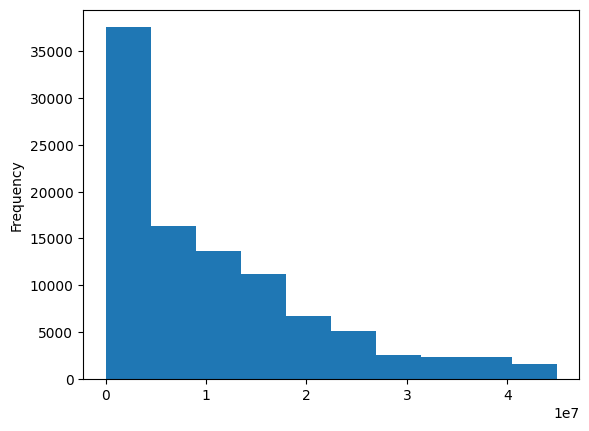

In [55]:
house_prices["price"].plot(kind="hist") #histogram

In [52]:
import pandas as pd
import numpy as np
house_prices = pd.read_csv("house_prices.csv", index_col=0)
house_prices["price_log"] = np.log10(house_prices["price"])
house_prices 

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,price_log
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,7.000000
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,6.838849
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,7.217484
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,7.638489
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,6.845098
...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,6.875061
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0,6.944483
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,7.146128
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0,7.146128


### Discretization
แบ่งกลุ่มข้อมูล จับกลุ่ม

In [60]:
from sklearn.preprocessing import KBinsDiscretizer # K ค่าคงที่

สร้าง object

In [72]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(encode="ordinal")  # default 5 ช่วง , ordinal แบ่งช่วงแค่ใน column, ไม่มี ordinal จะแยกหลาย column
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
discretizer.fit(house_prices[["price_log"]])
house_prices["price_log_bin"] = discretizer.transform(house_prices[["price_log"]])
house_prices

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,price_log,price_log_bin
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,7.000000,2.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,6.838849,2.0
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,7.217484,3.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,7.638489,4.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,6.845098,2.0
...,...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,6.875061,2.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0,6.944483,2.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,7.146128,3.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0,7.146128,3.0


# Encoding
ทำข้อมูลให้เป็นตัวเลข

### one hot encoder

In [78]:
from sklearn.preprocessing import OneHotEncoder 

### get dummies 
ง่ายกว่า one hot encoder  
แปลงข้อมูลเป็น one hot (แบ่งเป็น column)

In [82]:
pd.get_dummies(house_prices, columns=["purpose"])

,property_type,price,location,city,baths,bedrooms,Area_in_Marla,price_log,price_log_bin,purpose_For Rent,purpose_For Sale
0,Flat,10000000,G-10,Islamabad,2,2,4.0,7.000000,2.0,False,True
1,Flat,6900000,E-11,Islamabad,3,3,5.6,6.838849,2.0,False,True
2,House,16500000,G-15,Islamabad,6,5,8.0,7.217484,3.0,False,True
3,House,43500000,Bani Gala,Islamabad,4,4,40.0,7.638489,4.0,False,True
4,House,7000000,DHA Defence,Islamabad,3,3,8.0,6.845098,2.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,3,8.0,6.875061,2.0,False,True
168436,House,8800000,Bahria Town Karachi,Karachi,4,3,8.0,6.944483,2.0,False,True
168438,House,14000000,Bahria Town Karachi,Karachi,3,3,8.0,7.146128,3.0,False,True
168439,House,14000000,Bahria Town Karachi,Karachi,4,4,14.0,7.146128,3.0,False,True


In [85]:
pd.get_dummies(house_prices, columns=["purpose"], dtype=int) #dtype = data type, default Boolean (True, False)

,property_type,price,location,city,baths,bedrooms,Area_in_Marla,price_log,price_log_bin,purpose_For Rent,purpose_For Sale
0,Flat,10000000,G-10,Islamabad,2,2,4.0,7.000000,2.0,0,1
1,Flat,6900000,E-11,Islamabad,3,3,5.6,6.838849,2.0,0,1
2,House,16500000,G-15,Islamabad,6,5,8.0,7.217484,3.0,0,1
3,House,43500000,Bani Gala,Islamabad,4,4,40.0,7.638489,4.0,0,1
4,House,7000000,DHA Defence,Islamabad,3,3,8.0,6.845098,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,3,8.0,6.875061,2.0,0,1
168436,House,8800000,Bahria Town Karachi,Karachi,4,3,8.0,6.944483,2.0,0,1
168438,House,14000000,Bahria Town Karachi,Karachi,3,3,8.0,7.146128,3.0,0,1
168439,House,14000000,Bahria Town Karachi,Karachi,4,4,14.0,7.146128,3.0,0,1


# Feature Crossing

In [87]:
house_prices_oh = pd.get_dummies(house_prices, columns=["purpose"], dtype=int)

In [91]:
house_prices_oh["baths_bedrooms"] = house_prices_oh["baths"] * house_prices_oh["bedrooms"]
house_prices_oh

,property_type,price,location,city,baths,bedrooms,Area_in_Marla,price_log,price_log_bin,purpose_For Rent,purpose_For Sale,baths_bedrooms
0,Flat,10000000,G-10,Islamabad,2,2,4.0,7.000000,2.0,0,1,4
1,Flat,6900000,E-11,Islamabad,3,3,5.6,6.838849,2.0,0,1,9
2,House,16500000,G-15,Islamabad,6,5,8.0,7.217484,3.0,0,1,30
3,House,43500000,Bani Gala,Islamabad,4,4,40.0,7.638489,4.0,0,1,16
4,House,7000000,DHA Defence,Islamabad,3,3,8.0,6.845098,2.0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,3,8.0,6.875061,2.0,0,1,9
168436,House,8800000,Bahria Town Karachi,Karachi,4,3,8.0,6.944483,2.0,0,1,12
168438,House,14000000,Bahria Town Karachi,Karachi,3,3,8.0,7.146128,3.0,0,1,9
168439,House,14000000,Bahria Town Karachi,Karachi,4,4,14.0,7.146128,3.0,0,1,16


In [145]:
# ข้อมูลพร้อม = เป็นตัวเลขหมดแล้ว
house_prices_small = house_prices_oh[["price", "baths", "bedrooms", "Area_in_Marla"]]
house_prices_small

,price,baths,bedrooms,Area_in_Marla
0,10000000,2,2,4.0
1,6900000,3,3,5.6
2,16500000,6,5,8.0
3,43500000,4,4,40.0
4,7000000,3,3,8.0
...,...,...,...,...
168435,7500000,3,3,8.0
168436,8800000,4,3,8.0
168438,14000000,3,3,8.0
168439,14000000,4,4,14.0


# การวัดประสิทธิภาพ feature


#### แบ่งข้อมูลเป็น 2 ส่วน

In [97]:
from sklearn.model import train_test_split

train, test = train_test_split(house_prices_small, test_size=0.3, random_state=1234)
len(train), len(test)

(69649, 29850)

In [149]:
random_numbers = np.random.random(size=house_prices_small.shape[0])
house_prices_small["random"] = random_numbers

train, test = train_test_split(house_prices_small, test_size=0.3, random_state=1234)
len(train), len(test)

C:\Users\rtkmm\AppData\Local\Temp\ipykernel_12540\832171088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_small["random"] = random_numbers


(69649, 29850)

#### importance
สร้างโมเดลหลาย ๆ ครั้ง โดย เอา feature ออกทีละตัว เพื่อดูความสำคัญของแต่ละ feature

In [165]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

features = ["baths", "bedrooms", "Area_in_Marla", "random"]
price = "price"

model = LinearRegression()
model.fit(train[features], train[price])

importances = permutation_importance(model, test[features], test[price])
importances = pd.Series(importances.importances_mean, index=features)
importances.sort_values(ascending=False)
importances  #ยิ่งเลขน้อยยิ่งไม่มีความสำคัญ  --> ในข้อนี้ random ไม่มีความสำคัญ

baths            0.312594
bedrooms         0.042311
Area_in_Marla    0.005525
random          -0.000043
dtype: float64